In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import linear_model
from sklearn import preprocessing
from IPython.display import display

In [10]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [32]:
# import csv file
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master' +
                 '/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

# clean up the dataframe
df = df.drop([0,1,2])
df = df.rename(columns=df.iloc[0])
df = df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'Murder', 'Property\ncrime':'Property Crime'})
df = df.drop([3])
df = df.reset_index(drop = True)

In [33]:
# Change Population from object to int
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = pd.to_numeric(df['Population']).astype(float)

# Set up 'Murder', 'Robbery' and 'Property Crime' for later use
df['Murder'] = df['Murder'].str.replace(',', '')

df['Robbery'] = df['Robbery'].str.replace(',', '')

df['Property Crime'] = df['Property Crime'].str.replace(',', '')
df['Property Crime'] = pd.to_numeric(df['Property Crime']).astype(float)

In [34]:
# Create a Feature dataframe
features = pd.DataFrame()

# set 'Population' and 'Population^2' as feature
## in feature, the values will be in thousands
features['Population'] = (df['Population'] / 1000).dropna()
features['Population^2'] = features['Population']**2

In [35]:
# set 'Murder' and 'Robbery' as feature
# coded any number > 0 as 1
# coded any number = 0 as 0
features['Murder'] = df['Murder'].dropna()
features['Murder'] = features['Murder'].str.contains('0').apply(lambda x:0 if x else 1)

features['Robbery'] = df['Robbery'].dropna()
features['Robbery'] = features['Robbery'].str.contains('0').apply(lambda x:0 if x else 1)

In [36]:
# add 'Property Crime' as targeted variable in feature dataframe
features['Property Crime'] = df['Property Crime']

In [37]:
features.head()

,Population,Population^2,Murder,Robbery,Property Crime
0,1.861,3.463,0,0,12.000
1,2.577,6.641,0,0,24.000
2,2.846,8.100,0,0,16.000
3,97.956,9595.378,1,1,4090.000
4,6.388,40.807,0,1,223.000


In [38]:
#normalize method
features_normalized = preprocessing.normalize(features, norm='l2')
features_normalized

array([[  1.47374836e-01,   2.74264570e-01,   0.00000000e+00,
          0.00000000e+00,   9.50294483e-01],
       [  1.02936576e-01,   2.65267557e-01,   0.00000000e+00,
          0.00000000e+00,   9.58664271e-01],
       [  1.56737189e-01,   4.46074039e-01,   0.00000000e+00,
          0.00000000e+00,   8.81164800e-01],
       ..., 
       [  8.71021721e-02,   5.16602983e-01,   0.00000000e+00,
          0.00000000e+00,   8.51783171e-01],
       [  5.01275127e-03,   9.98209211e-01,   2.51727544e-05,
          0.00000000e+00,   5.96090823e-02],
       [  2.64739975e-02,   9.70086689e-01,   0.00000000e+00,
          7.22484443e-04,   2.41309804e-01]])

# min max scaler
min_max_scaler = preprocessing.MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)
features_normalized = pd.DataFrame(features_scaled)
features_normalized.head()

# through normalization formula
features_norm = (features - features.mean()) / (features.max() - features.min())
features_norm.abs().head()

In [41]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Property Crime'].values.reshape(-1, 1)
X = features[['Population', 'Population^2', 'Murder', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.42627491e+01  -2.06539709e-03   2.29122547e+01  -6.85577640e+01]]

Intercept: 
 [-123.51616424]

R-squared:
0.996111253825


    # R-Squared = 0.996 is too high, need to do something...

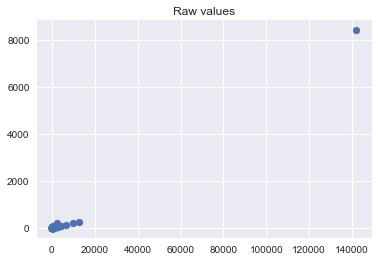

In [42]:
# Plot scatter graph to identify outliers
plt.scatter(Y, X['Population'])
plt.title('Raw values')
plt.show()

    # spotted an outlier that completely mess with the dataset

In [43]:
# Remove the outlier
loc = features.loc[lambda x: features['Population^2'] == features['Population^2'].max()]
print(loc)
features = features.drop(loc.index)

     Population  Population^2  Murder  Robbery  Property Crime
216    8396.126  70494931.808       1        0      141971.000


In [44]:
# Reinstantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Property Crime'].values.reshape(-1, 1)
X = features[['Population', 'Population^2', 'Murder', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)  
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.35734596e+01   1.12440051e-01   2.16342433e+02   6.93588504e+01]]

Intercept: 
 [-9.96299026]

R-squared:
0.844337942375


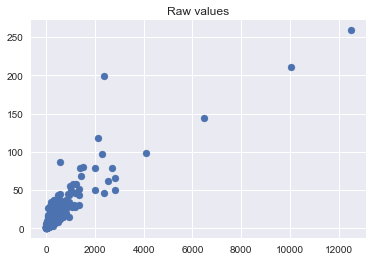

In [45]:
# Plot scatter graph to identify outliers
plt.scatter(Y, X['Population'])
plt.title('Raw values')
plt.show()

    # after removing outlier, R-square = 0.844 (reasonably high)

        *run histogram and then use z-normalization
        * set the outliers to largest value in normalized data
    # There are also few more outliers, will need to remove them or adjust their values for more accurate model

,Population,Population^2,Murder,Robbery
Population,1.000,0.889,0.495,0.209
Population^2,0.889,1.000,0.345,0.065
Murder,0.495,0.345,1.000,0.163
Robbery,0.209,0.065,0.163,1.000


<function matplotlib.pyplot.show>

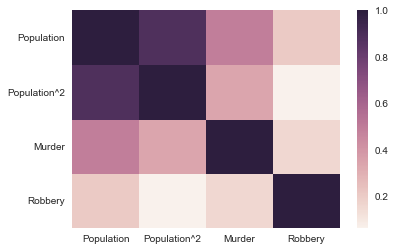

In [47]:
correlation_matrix = X.corr()
display(correlation_matrix)

# show heatmap
sns.heatmap(correlation_matrix)
plt.show

# remove of Population because correlation is too high

In [50]:
# Reinstantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Property Crime'].values.reshape(-1, 1)
X = features[['Population^2', 'Murder', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)  
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.71449698e-01   4.24923936e+02   1.61383294e+02]]

Intercept: 
 [ 68.48463067]

R-squared:
0.824777477


    # I decided with population^2 beacuse R-squared value was higher
    
        Property Crime = Intercept (alpha) + 
                     Coef_1 * Population^2 +
                     Coef_2 * Murder +
                     Coef_3 * Robbery
                     
    * need to explain the results
    
    * find other metrics in the scklit package

,Population^2,Murder,Robbery
Population^2,1.000,0.345,0.065
Murder,0.345,1.000,0.163
Robbery,0.065,0.163,1.000


<function matplotlib.pyplot.show>

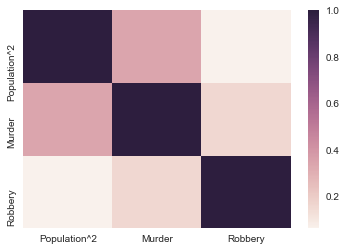

In [51]:
correlation_matrix = X.corr()
display(correlation_matrix)

# show heatmap
sns.heatmap(correlation_matrix)
plt.show

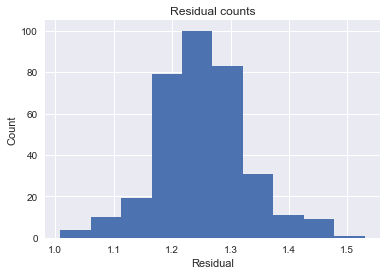

In [56]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = features['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

### added this to normalize the data to avoid skewness
residual = residual.abs() ** (1/20)     

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

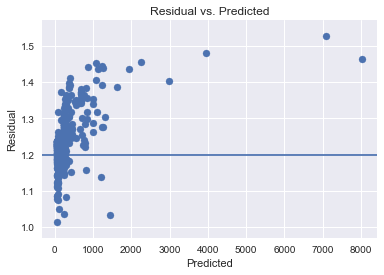

In [403]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 1.2)
plt.title('Residual vs. Predicted')
plt.show()

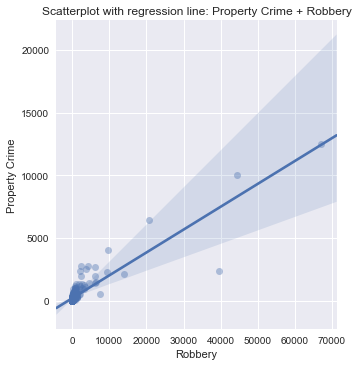

In [60]:
# this is to determine the linear relationship between the variables
## shouldn't apply to categorical variable 

g = sns.lmplot(y = 'Property Crime', 
               x = 'Population^2',
               data = features, # Data.
               fit_reg = True, # The regression line also includes a 95% confidence envelope.
               scatter_kws = {'alpha':0.4})
g.set_ylabels("Property Crime")
g.set_xlabels(x)
sns.plt.title('Scatterplot with regression line: Property Crime + ' +  x)
plt.show()